In [141]:
import numpy as np
import matplotlib.pyplot as plt

## Aufgabe 5
Wir erstellen eine Funktion, welche die Matrix aus der Aufgabe aufstellt.

In [142]:
def make_amatrix(m: int) -> np.array:
    n = m*m
    A = np.zeros((n,n))
    B = make_bmatrix(m)

    for l in range(0,m):
        A[l*m:(l+1)*m, l*m:(l+1)*m] = B

    for l in range(0,m-1):
        A[l*m:(l+1)*m, (l+1)*m:(l+2)*m] = (-1)*np.eye(m)
        A[(l+1)*m:(l+2)*m, l*m:(l+1)*m] = (-1)* np.eye(m)

    return A


def make_bmatrix(m: int) -> np.array:
    B = np.zeros([m,m])
    np.fill_diagonal(B,4)
    for i in range(1, m):
        B[i, i-1] = -1
        B[i-1, i] = -1
    return B

A = make_amatrix(3)
print(A)

[[ 4. -1.  0. -1. -0. -0.  0.  0.  0.]
 [-1.  4. -1. -0. -1. -0.  0.  0.  0.]
 [ 0. -1.  4. -0. -0. -1.  0.  0.  0.]
 [-1. -0. -0.  4. -1.  0. -1. -0. -0.]
 [-0. -1. -0. -1.  4. -1. -0. -1. -0.]
 [-0. -0. -1.  0. -1.  4. -0. -0. -1.]
 [ 0.  0.  0. -1. -0. -0.  4. -1.  0.]
 [ 0.  0.  0. -0. -1. -0. -1.  4. -1.]
 [ 0.  0.  0. -0. -0. -1.  0. -1.  4.]]


Die Richardson-Iteration ist relativ einfach und wird mit der Formel
$$x=\Phi(x)=(I-DA)x+Db$$
berechnet.

In [143]:
def richardson(A: np.array, b:np.ndarray, D: np.array, max_iter: int) -> np.array:
    n = np.shape(A)[0]
    I = np.eye(n)
    x = np.zeros((max_iter,n))

    # Iterationsvorschrift
    for i in range(0,max_iter-1):
        x[i+1, :] = (I - D @ A) @ x[i, :] + (D @ b)

    return x


Für unterschiedliche Werte von $D$ haben wir unterschiedliche Fehler. Für $D = I$ divergiert die Iteration sehr stark, für $D = \omega I$ mit $\omega = 0.2$ und $D = diag(A_{11},\dots,A_{nn})$ konvergiert die Iteration (linear) gegen die Lösung des linearen Gleichungssystems

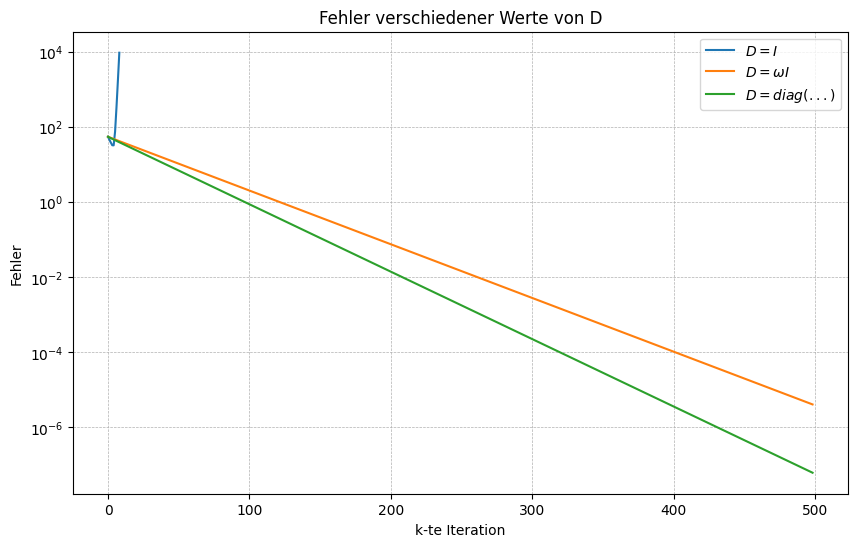

In [144]:
def error_calc(A: np.array, D: np.array, max_iter: int) -> np.array:
    # Funktion für die Fehlerberechnung, welche für unterschiedliche D die Iteration durchführt.
    n = np.shape(A)[0]
    b = np.ones(n)
    exact_x = np.linalg.solve(A, b)
    error = np.zeros(max_iter-1)

    x = richardson(A, b, D, max_iter)

    # Fehlerberechnung
    for i in range(0,max_iter-1):
        error[i] = np.linalg.norm(exact_x - x[i, :])

    return error

# Dictionary zur einfachereren Darstellung
werte = {
    "id": [],
    "omega": [],
    "diag": []
}

A = make_amatrix(10)
n = np.shape(A)[0]

D = np.eye(n)
werte["id"] = error_calc(A, D, 10)

D = 0.2*np.eye(n)
werte["omega"] = error_calc(A, D, 500)

np.fill_diagonal(D, 1/np.diag(A))
werte["diag"] = error_calc(A, D, 500)

# Hier wird nur geplottet
plt.figure(figsize=(10, 6))
plt.plot(werte["id"], label="$D=I$")
plt.plot(werte["omega"], label="$D=\omega I$")
plt.plot(werte["diag"], label="$D=diag(...)$")
plt.xlabel("k-te Iteration")
plt.ylabel("Fehler")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.title("Fehler verschiedener Werte von D")
plt.show()
